<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Authors: [Yury Kashnitskiy](https://yorko.github.io) and [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/). Translated and edited by  [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #1. Spring 2019 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Exploratory data analysis with Pandas](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly) 
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 
 - you can also practice with demo assignments, which are simpler and already shared with solutions: [A1 demo](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset), [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution), [A2 demo](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data), [solution](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution)

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1Q_5rY7Paed4Xc_THtrfE3OSaB3sJerYuJ7NCHtqRbKs). Solutions will be shared only with those who've filled in this form 
 3. submit answers with some email and **remember it**! This will be your ID during the course. Specify your real full name in the form as well (no nicks allowed in the final top-100 [rating](https://mlcourse.ai/rating)). If in doubt, you can re-submit the form till the deadline for A1, no problem, but stick to only one email.
 
### <center> Deadline for A1: 2019 February 24, 20:59 GMT (London time)
    
You'll get up to 12 credits for this assignment - the web-form score will be halved and rounded.

In [164]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb, [alternative link](https://drive.google.com/file/d/1C5nTzitvJ0ho2Crpqnghg9r2yq98Xxun/view?usp=sharing)). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [165]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [166]:
%%time
# change the path if needed
path = 'data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

Wall time: 1min 52s


**Check the number of rows and columns and print column names.**

In [167]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [168]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Transpose the frame to see all features at once.**

In [169]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [170]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [171]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [172]:
flights_df['UniqueCarrier'].nunique()

20

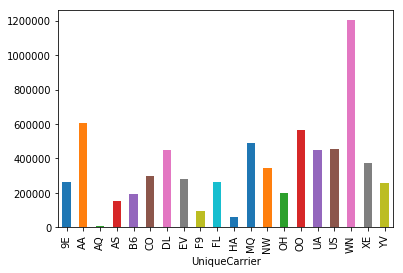

In [173]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [174]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [175]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [176]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

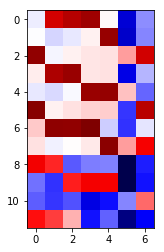

In [177]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

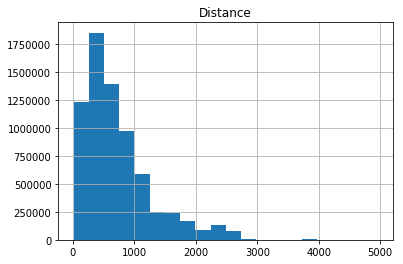

In [178]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [179]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [180]:
num_flights_by_date = flights_df.groupby('Date').size()

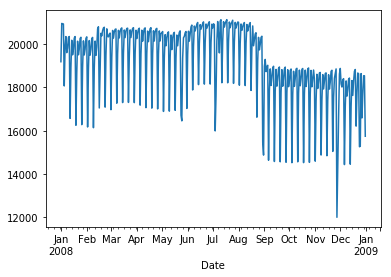

In [181]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

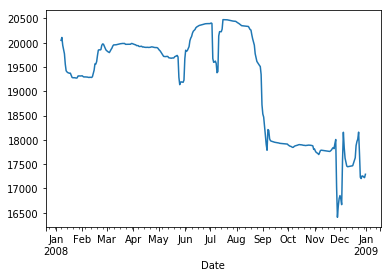

In [182]:
num_flights_by_date.rolling(window=7).mean().plot();

### Now it's your turn. Answer the questions below.

**1. How many unique carriers are there in our dataset?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

- 10
- 15
- 20
- 25 

In [183]:
flights_df.UniqueCarrier.nunique()

20

**2. We have  both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?** <br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

*Hint:* Take a look at *Cancelled* to see the categories and *FlightNum* column to calculate unique flights for each category.

- Cancelled overweights completed by 329 flights
- Completed overweights cancelled by 6734860 flights
- Cancelled overweights completed by 671 flights
- Completed overweights cancelled by 11088967 flights

In [184]:
flights_df.FlightNum.nunique()

7539

In [185]:
flights_df.Cancelled.value_counts()

0    6872294
1     137434
Name: Cancelled, dtype: int64

In [186]:
x = len(flights_df[flights_df.Cancelled==0]) #completed flights - 6872294
y = len(flights_df) #total flights - 7009728
z = len(flights_df[flights_df.Cancelled==1]) #cancelled flights - 137434
print(z)
print(x-z)

137434
6734860


## Answer: Completed overweights cancelled by 6734860 flights

**3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

- yes, ATL
- yes, HNL
- yes, MSP
- no

In [187]:
max_dep_delay = max(flights_df['DepDelay'])
print(flights_df[flights_df['DepDelay']==max_dep_delay]['Dest'])
print(flights_df[flights_df['DepDelay']==max_dep_delay]['UniqueCarrier'])

max_arr_delay = max(flights_df['ArrDelay'])
print(flights_df[flights_df['ArrDelay']==max_arr_delay]['Dest'])
print(flights_df[flights_df['ArrDelay']==max_arr_delay]['UniqueCarrier'])

2235378    MSP
Name: Dest, dtype: object
2235378    NW
Name: UniqueCarrier, dtype: object
1018798    MSP
Name: Dest, dtype: object
1018798    NW
Name: UniqueCarrier, dtype: object


## Answer: yes, MSP

**4. Find the carrier that has the greatest number of cancelled flights.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

- AA
- MQ
- WN
- CO 

In [188]:
flights_df[flights_df.Cancelled==1]['UniqueCarrier'].value_counts().iloc[0:5]

MQ    18331
AA    17440
OO    12436
WN    12389
UA    10541
Name: UniqueCarrier, dtype: int64

## Answer: MQ

**5. Let's examine departure time (*DepTime* column). Let's see how all flights are distributed by time. For simplicity, consider distribution by hour. Which hour has the highest percentage of flights?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

*Hint:* Check time format [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236).

- 1 am 
- 6 am
- 11 am  
- 3 pm 

In [189]:
flights_df['DepHour'] = round(flights_df['DepTime']/100)
#flights_df['DepHour'] = flights_df['DepTime'].floordiv(100)
flights_df['DepHour'].value_counts().iloc[0:5]

6.0     461676
8.0     457092
7.0     447239
10.0    443429
11.0    435640
Name: DepHour, dtype: int64

## Answer: 6 am

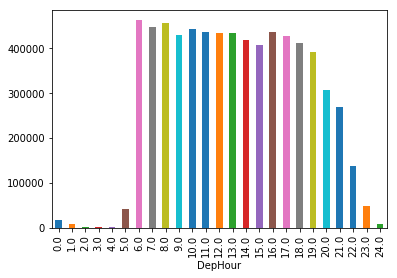

In [190]:
flights_df.groupby('DepHour').size().plot(kind='bar')

**6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

- 2 am
- 9 pm  
- 8 am  
- 3 am 

In [191]:
flights_df[flights_df.Cancelled==1]['DepHour'].value_counts().tail()

5.0     10
0.0      7
1.0      3
24.0     3
2.0      2
Name: DepHour, dtype: int64

## Answer: 2 am

**7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

- 3
- 19
- 22
- 4

In [192]:
flights_df[flights_df.Cancelled==1]['DepHour'].value_counts()

7.0     89
16.0    82
19.0    80
21.0    79
6.0     76
8.0     75
17.0    70
18.0    67
15.0    66
9.0     65
22.0    59
20.0    58
10.0    57
12.0    56
11.0    56
14.0    53
13.0    48
23.0    27
5.0     10
0.0      7
1.0      3
24.0     3
2.0      2
Name: DepHour, dtype: int64

## Answer: 3 , 4

**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

*Hint:* Consider only *completed* flights.

- 20
- 21
- 9
- 6

In [193]:
flights_df[flights_df.Cancelled==0]['DepHour'].value_counts().head()

6.0     461600
8.0     457017
7.0     447150
10.0    443372
11.0    435584
Name: DepHour, dtype: int64

## Answer: 6am

**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-7 am
- yes, at 9-11 am
- yes, at 1-3 pm

In [194]:
flights_df[flights_df.Cancelled==0].groupby(['DepHour']).agg({'DepDelay': [np.mean, np.sum, 'count']})

DepDelay                      
               mean           sum   count
DepHour                                  
0.0       71.000000           inf   17633
1.0       98.000000           inf    7493
2.0      122.125000           inf    2310
3.0      105.875000           inf     831
4.0       24.468750  2.870400e+04    1173
5.0       -3.728516          -inf   41775
6.0       -2.130859          -inf  461600
7.0       -0.354248          -inf  447150
8.0        1.417969           inf  457017
9.0        3.429688           inf  429580
10.0       5.156250           inf  443372
11.0       6.480469           inf  435584
12.0       7.734375           inf  434445
13.0       8.460938           inf  432926
14.0      10.343750           inf  417781
15.0      11.656250           inf  407242
16.0      11.945312           inf  435292
17.0      12.890625           inf  426131
18.0      15.171875           inf  410661
19.0      16.234375           inf  391132
20.0      21.796875           inf  306904
21.0      21.765625           inf  268158
22.0      35.687500           inf  138017
23.0      60.218750           inf   49119
24.0      44.406250           inf    8968

## Answer: yes, 5-7am

**10. Considering only the completed flights by the carrier, that you have found in Question 3, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

*Hint:* Consider *all* flights.

- at noon
- at 6 am
- at 8 pm
- at 9 am

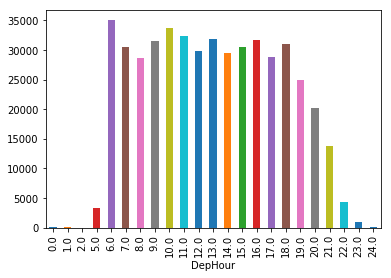

In [195]:
# from Q4 (MQ) not Q3 (NW)
x = [flights_df[flights_df.UniqueCarrier=='MQ']]['Cancelled'==0]

#flights_df.Cancelled==0
x.groupby(['DepHour']).size().plot(kind='bar')

## Answer: at 6 am

**11. Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

- DL
- AA
- OO
- EV

In [196]:
flights_df[flights_df.Cancelled==0]['UniqueCarrier'].value_counts().iloc[0:10]

WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: UniqueCarrier, dtype: int64

## Answer: EV

**12. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

- Carrier
- Weather conditions
- National Air System
- Security reasons

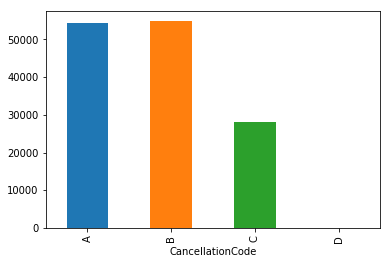

In [197]:
flights_df.groupby(['CancellationCode']).size().plot(kind='bar')

## Answer: B - weather

**13. Which route is the most frequent, in terms of the number of flights?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

*Hint: Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes)*

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (LAX-SFO)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [198]:
flights_df['Route'] = flights_df['Origin']+'-'+flights_df['Dest']
flights_df['Route'].value_counts().iloc[0:5]

SFO-LAX    13788
LAX-SFO    13390
OGG-HNL    12383
LGA-BOS    12035
BOS-LGA    12029
Name: Route, dtype: int64

## Answer: SFO-LAX

**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

_Hint_: consider only positive delays

- 449 
- 539 
- 549 
- 668

In [199]:
x = flights_df
x = x[x.DepDelay>0]

top_5 = x.groupby(['Route']).agg({'DepDelay': [np.mean, np.sum, 'count']})\
    .sort_values(('DepDelay', 'count'), ascending=False)\
    .iloc[0:5]
print(top_5)
top_5 = top_5.reset_index()
top_5.columns=['Route','d1','d2','d3']

          DepDelay           
              mean  sum count
Route                        
LAX-SFO  37.281250  inf  6253
DAL-HOU  19.078125  inf  5742
SFO-LAX  37.968750  inf  5322
ORD-LGA  45.468750  inf  5311
HOU-DAL  21.906250  inf  5288


In [200]:
x1 = len(flights_df[flights_df.Route=='LAX-SFO'][flights_df.WeatherDelay>0])
x2 = len(flights_df[flights_df.Route=='DAL-HOU'][flights_df.WeatherDelay>0])
x3 = len(flights_df[flights_df.Route=='SFO-LAX'][flights_df.WeatherDelay>0])
x4 = len(flights_df[flights_df.Route=='ORD-LGA'][flights_df.WeatherDelay>0])
x5 = len(flights_df[flights_df.Route=='HOU-DAL'][flights_df.WeatherDelay>0])

print(x1+x2+x3+x4+x5)


C:\Users\sita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\sita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sita\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


668


C:\Users\sita\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


## Answer: 668

**15. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

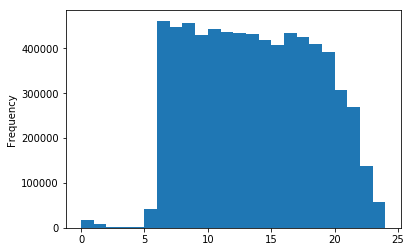

In [201]:
deptime = flights_df.DepHour
deptime = deptime.dropna()
deptime.plot.hist(bins=24)

## Answer: In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q16-20__*

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.

_Hint_: Look for official meteorological winter months for the Nothern Hemisphsere.

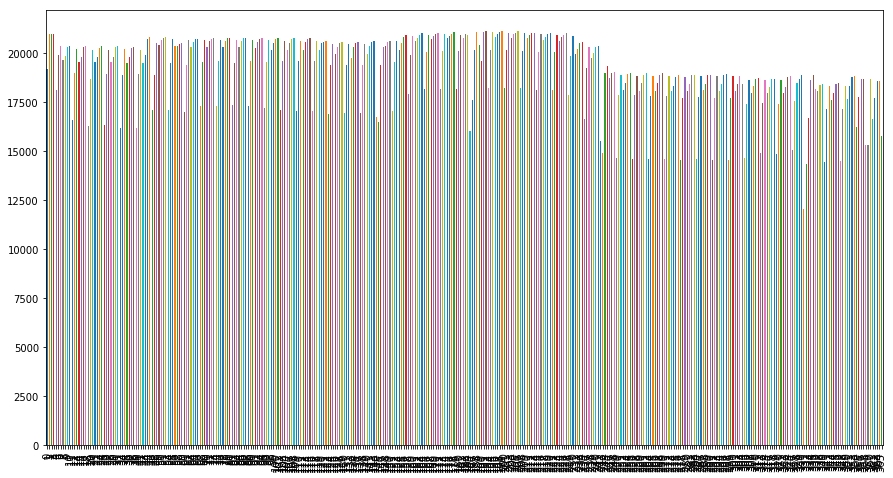

In [202]:
daily_flight_count = flights_df.groupby([flights_df.Date]).size().reset_index()
daily_flight_count.columns=['Date','Count']
daily_flight_count['Count'].plot(kind='bar',figsize=(15,8))

Month
1     605765
2     569236
3     616090
4     598126
5     606293
6     608665
7     627931
8     612279
9     540908
10    556205
11    523272
12    544958
dtype: int64
Winter: 1673995
Summer: 1842889


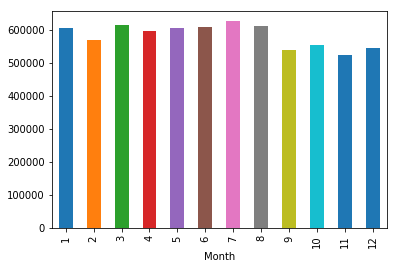

In [203]:
monthly_flight_count = flights_df.groupby([flights_df.Month]).size()
monthly_flight_count.plot(kind='bar')
print(monthly_flight_count)
print('Winter:', monthly_flight_count[1]+monthly_flight_count[11]+monthly_flight_count[12])
print('Summer:', monthly_flight_count[5]+monthly_flight_count[6]+monthly_flight_count[7])

DayOfWeek
1    1036201
2    1032049
3    1039665
4    1032224
5    1035166
6     857536
7     976887
dtype: int64


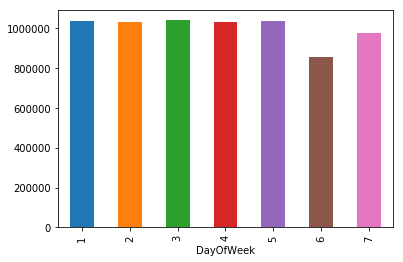

In [204]:
weekday_flight_count = flights_df.groupby([flights_df.DayOfWeek]).size()
weekday_flight_count.plot(kind='bar')
print(weekday_flight_count)

## Answer:

- The number of flights during weekends is less than during weekdays (working days).
- There are less flights during winter than during summer.

**17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q16-20__*

**Choose all correct statements:**
- October has the lowest number of cancellations due to weather. 
- The highest number of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [205]:
can_per_month = flights_df.groupby([flights_df.Month, flights_df.CancellationCode]).size()
pd.crosstab(flights_df.Month, flights_df.CancellationCode)
#A	Carrier
#B	Weather
#C	National Air System
#D	Security

CancellationCode,A,B,C,D
Month,,,,
1,6635,6711,3962,0
2,6090,10034,4470,2
3,6038,7520,2621,4
4,7312,1479,1564,0
5,3157,1461,1608,3
6,4251,3448,3232,0
7,5292,2612,2694,0
8,3852,3582,2401,0
9,2246,6478,1188,1


## Answer:
- October has the lowest number of cancellations due to weather.
- April's top cancellation reason is carriers.


**18. Which month has the greatest number of cancellations due to Carrier?** 

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q15-20__*

- May
- January
- September
- April

In [206]:
df = pd.crosstab(flights_df.Month, flights_df.CancellationCode)
df = df.reset_index()

In [207]:
df

CancellationCode,Month,A,B,C,D
0,1,6635,6711,3962,0
1,2,6090,10034,4470,2
2,3,6038,7520,2621,4
3,4,7312,1479,1564,0
4,5,3157,1461,1608,3
5,6,4251,3448,3232,0
6,7,5292,2612,2694,0
7,8,3852,3582,2401,0
8,9,2246,6478,1188,1
9,10,2097,600,552,0


In [208]:
max(df['A'])

7312

## Answer: April

**19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q15-20__*

- 9E
- EV
- HA
- AA

In [209]:
x = flights_df[flights_df.CancellationCode=='A']
y = x[x.Month==4]

In [210]:
z=y.groupby([y.UniqueCarrier]).size()
print(z)
max(z)

UniqueCarrier
9E     391
AA    3696
AS     135
B6      43
CO      50
DL     226
EV      29
F9       7
FL      81
HA      29
MQ     283
NW     122
OH      76
OO     298
UA     494
US     335
WN     533
XE      30
YV     454
dtype: int64


3696

## Answer: AA

**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q15-20__*

- EV
- OO
- AA
- AQ

In [211]:
df = flights_df[['FlightNum','UniqueCarrier', 'ArrDelay', 'DepDelay']]
df = df[df.ArrDelay>0]
df = df[df.DepDelay>0]
df = df[df.ArrDelay< np.percentile(df.ArrDelay, 95)]
df = df[df.DepDelay< np.percentile(df.DepDelay, 95)]
df.describe()

,FlightNum,ArrDelay,DepDelay
count,1.848286e+06,1848286.0,1848286.0
mean,2.143867e+03,NaN,NaN
std,1.914725e+03,0.0,0.0
min,1.000000e+00,1.0,1.0
25%,6.000000e+02,9.0,8.0
50%,1.526000e+03,20.0,19.0
75%,3.333000e+03,41.0,39.0
max,9.741000e+03,144.0,100.0


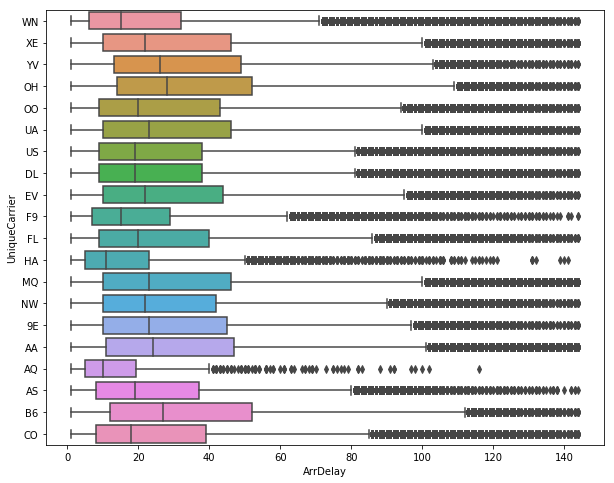

In [212]:
plt.figure(figsize=(10,8))
sns.boxplot(df.ArrDelay, df.UniqueCarrier)

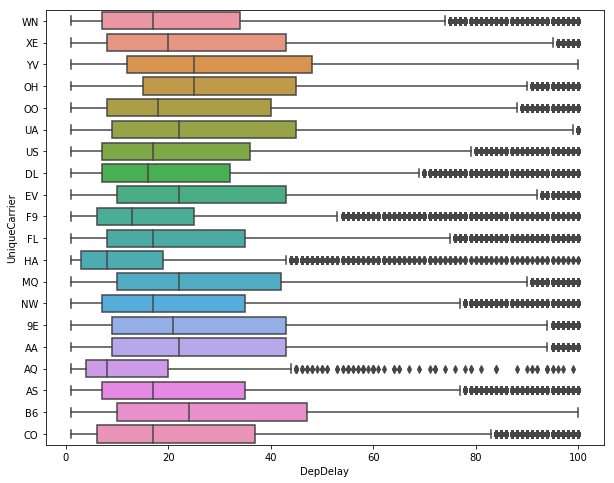

In [213]:
plt.figure(figsize=(10,8))
sns.boxplot(df.DepDelay, df.UniqueCarrier)

## Answer: AQ

That's it! How go and do 30 push-ups! :)